In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import streamlit as st
import joblib
from pprint import pprint

In [8]:
import os
os.chdir("C:\\Users\\kkeshav\\OneDrive - athenahealth\\Desktop\\E-Commerce Marketing")
data = pd.read_csv("ConsumerElectronics.csv", low_memory=False)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [10]:
data.describe()

,Year,Month,order_id,order_item_id,units,sla,product_mrp,product_procurement_sla
count,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06
mean,2.015519e+03,6.585650e+00,2.842445e+15,1.375628e+16,1.022087e+00,5.687832e+00,4.108309e+03,5.403451e+00
std,4.996557e-01,3.623351e+00,1.269134e+15,5.594598e+16,2.535318e-01,2.983336e+00,8.510918e+03,5.346618e+01
min,2.015000e+03,1.000000e+00,7.633152e+07,1.080165e+08,1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,2.015000e+03,3.000000e+00,1.602589e+15,1.606725e+15,1.000000e+00,4.000000e+00,7.990000e+02,1.000000e+00
50%,2.016000e+03,6.000000e+00,2.611825e+15,2.619185e+15,1.000000e+00,6.000000e+00,1.599000e+03,2.000000e+00
75%,2.016000e+03,1.000000e+01,3.610614e+15,4.397706e+15,1.000000e+00,7.000000e+00,3.499000e+03,3.000000e+00
max,2.016000e+03,1.200000e+01,5.395077e+15,3.000373e+17,5.000000e+01,1.006000e+03,2.999990e+05,1.000000e+03


In [11]:
data.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [12]:
data.isnull().sum()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
dtype: int64

In [13]:
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')

# Handle missing values (Drop rows with missing or invalid data)
data = data.dropna()

# Remove any duplicates in the dataset
data = data.drop_duplicates()

# Extract features from 'order_date' (like Day of the Week and Month)
data['Order_Day'] = data['order_date'].dt.day
data['Order_Month'] = data['order_date'].dt.month
data['Order_Day_of_Week'] = data['order_date'].dt.dayofweek

# Feature Engineering

# Define special sales days (for example, Black Friday, Christmas, New Year)
special_sale_days = ['2015-11-27', '2015-12-25', '2016-01-01']  # Black Friday, Christmas, New Year

# Create a 'Holiday_Flag' for special sale days
data['Holiday_Flag'] = np.where(data['order_date'].isin(pd.to_datetime(special_sale_days)), 1, 0)

# Adding "Pay Date" flag (assuming 1st and 15th of each month as pay dates)
data['Pay_Date_Flag'] = np.where(data['order_date'].dt.day.isin([1, 15]), 1, 0)

# Creating GMV per Unit and Discount Percentage

# Create GMV per Unit and Discount Percentage columns
# Ensure the correct column names for GMV ('gmv') and 'units' are used
data['GMV_per_Unit'] = pd.to_numeric(data['gmv'], errors='coerce') / data['units']

# Calculate discount percentage based on 'product_mrp' and 'GMV_per_Unit'
data['Discount'] = (data['product_mrp'] - data['GMV_per_Unit']) / data['product_mrp'] * 100

# Handle any remaining missing or infinite values in 'GMV_per_Unit' and 'Discount'
data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['GMV_per_Unit', 'Discount'])

# Check the updated dataset after feature engineering
data.head()


,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_vertical,product_mrp,product_procurement_sla,Order_Day,Order_Month,Order_Day_of_Week,Holiday_Flag,Pay_Date_Flag,GMV_per_Unit,Discount
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,...,CameraTripod,7190,0,17,10,5,0,0,6400.0,10.987483
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,...,CameraTripod,7190,0,19,10,0,0,0,6900.0,4.033380
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,...,CameraTripod,2099,3,20,10,1,0,0,1990.0,5.192949
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,...,CameraTripod,2099,3,14,10,2,0,0,1690.0,19.485469
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,...,CameraTripod,2099,3,17,10,5,0,0,1618.0,22.915674


In [14]:
data['gmv'] = pd.to_numeric(data['gmv'], errors='coerce')

# Optionally, drop rows with NaN values in 'gmv' if desired
data = data.dropna(subset=['gmv'])

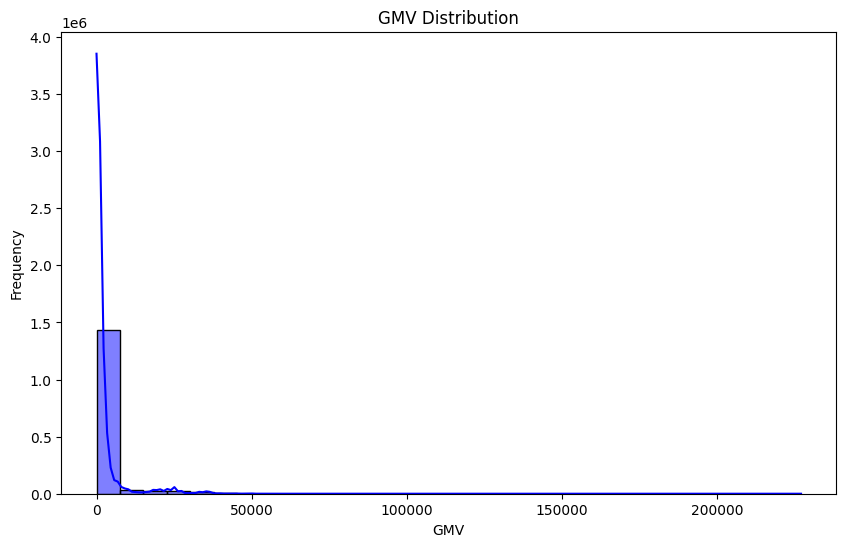

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of GMV (target variable)
plt.figure(figsize=(10, 6))
sns.histplot(data['gmv'], bins=30, kde=True, color='blue')
plt.title('GMV Distribution')
plt.xlabel('GMV')
plt.ylabel('Frequency')
plt.show()

C:\Users\kkeshav\AppData\Local\Temp\ipykernel_29680\848832158.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data["gmv"]+1), color="green")


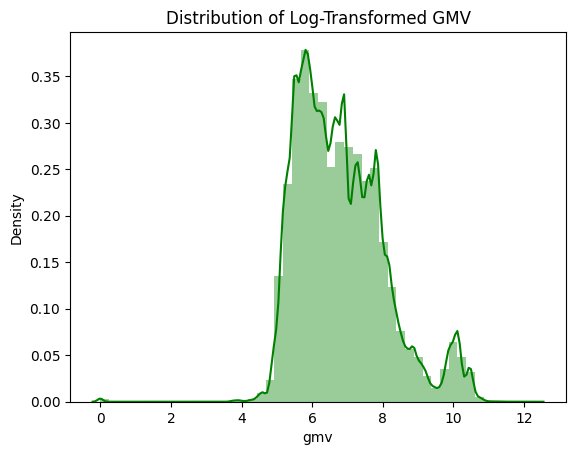

In [16]:
# Distribution of Log-Transformed GMV
sns.distplot(np.log(data["gmv"]+1), color="green")
plt.title("Distribution of Log-Transformed GMV")
plt.show()

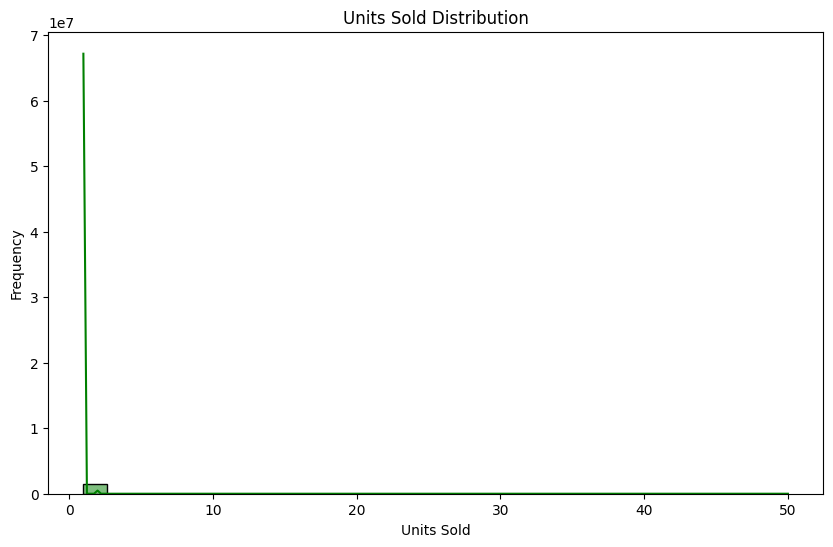

In [17]:
# Distribution of Units sold
plt.figure(figsize=(10, 6))
sns.histplot(data['units'], bins=30, kde=True, color='green')
plt.title('Units Sold Distribution')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()

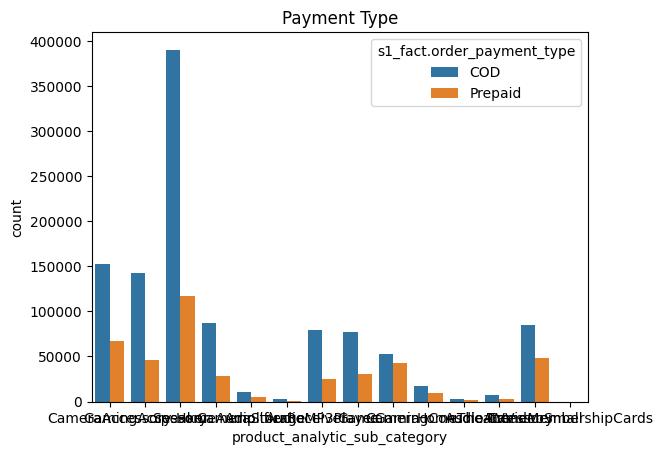

In [18]:
sns.countplot(data=data, x="product_analytic_sub_category", hue="s1_fact.order_payment_type")
plt.title("Payment Type")
plt.show()

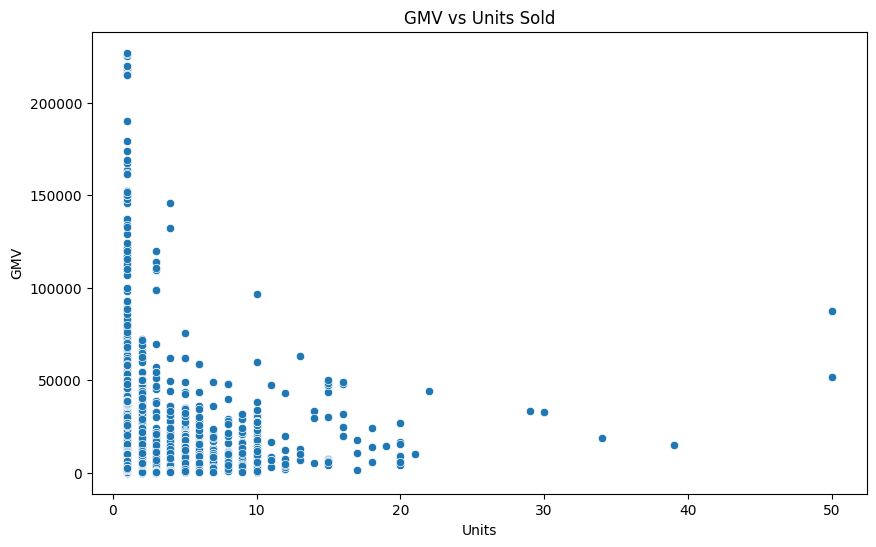

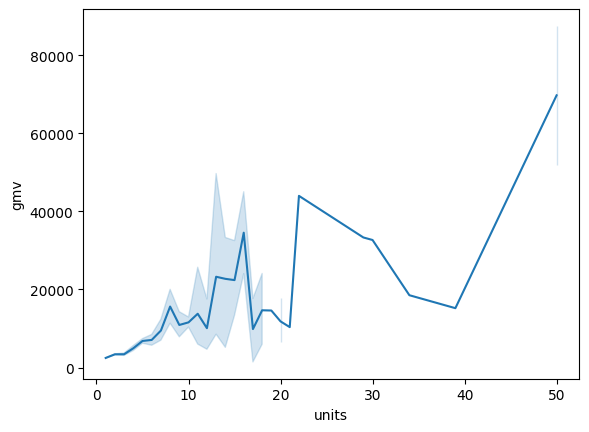

In [19]:
# Bivariate Analysis: GMV vs Units Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x='units', y='gmv', data=data)
plt.title('GMV vs Units Sold')
plt.xlabel('Units')
plt.ylabel('GMV')
plt.show()

sns.lineplot(data=data, x ="units", y="gmv")
plt.show()

C:\Users\kkeshav\AppData\Local\Temp\ipykernel_29680\773529851.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="units", y="product_mrp", palette="rainbow")


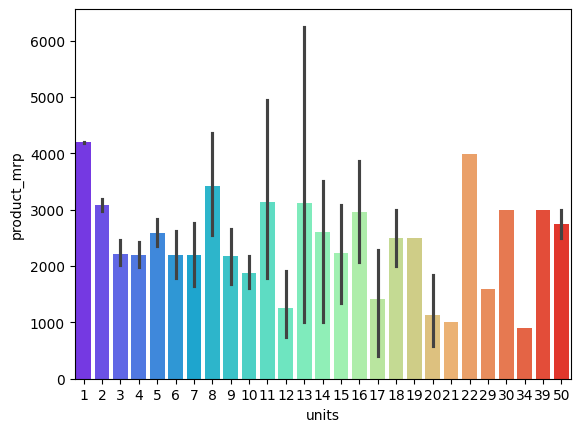

In [20]:
sns.barplot(data=data, x="units", y="product_mrp", palette="rainbow")
plt.show()

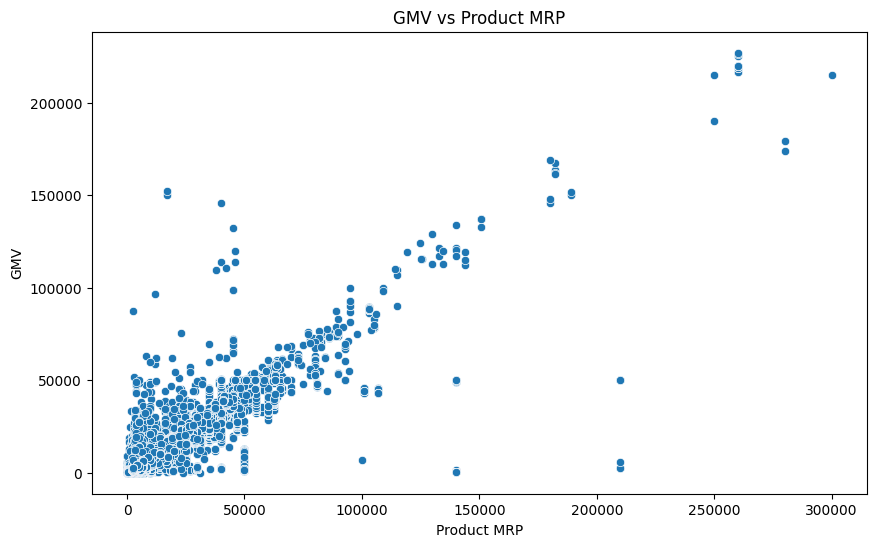

In [21]:
# Bivariate Analysis: GMV vs Product MRP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='product_mrp', y='gmv', data=data)
plt.title('GMV vs Product MRP')
plt.xlabel('Product MRP')
plt.ylabel('GMV')
plt.show()

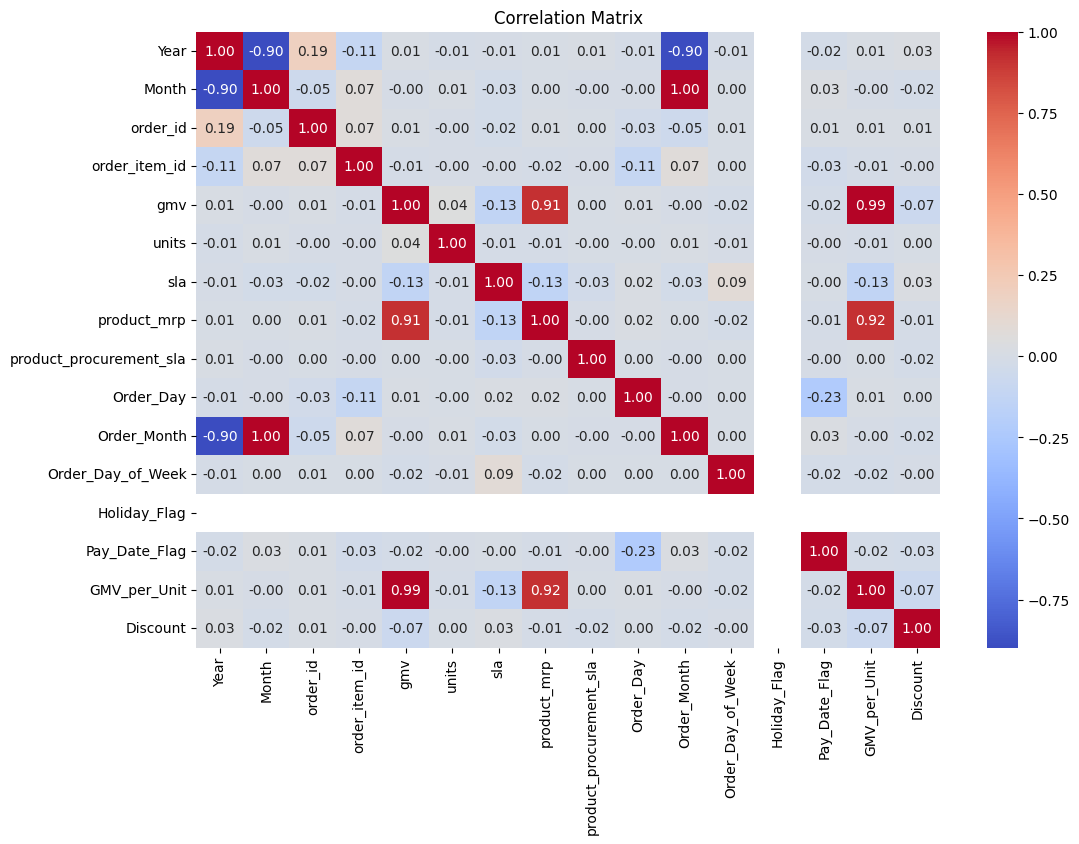

In [22]:
# Correlation Heatmap
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])

# Check if we have any numeric columns left
if not numeric_data.empty:
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numeric columns available for correlation.")

In [23]:
# First, check the actual column names in the DataFrame to ensure correctness
data.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla', 'Order_Day', 'Order_Month',
       'Order_Day_of_Week', 'Holiday_Flag', 'Pay_Date_Flag', 'GMV_per_Unit',
       'Discount'],
      dtype='object')

In [24]:
# Select important features (ensure column names match your DataFrame)
selected_features = ['units', 'product_mrp', 'Discount', 'Holiday_Flag', 'Pay_Date_Flag', 'Order_Day', 'Order_Month']

# Split the data into features (X) and target (y)
# Ensure the selected features exist in the DataFrame
X = data[selected_features]

# Make sure the target variable 'gmv' is available and named correctly
y = data['gmv']  # Target variable (use lowercase to match the updated DataFrame)

In [25]:
print("Feature set (X):")
X.head()

Feature set (X):


,units,product_mrp,Discount,Holiday_Flag,Pay_Date_Flag,Order_Day,Order_Month
0,1,7190,10.987483,0,0,17,10
1,1,7190,4.033380,0,0,19,10
2,1,2099,5.192949,0,0,20,10
3,1,2099,19.485469,0,0,14,10
4,1,2099,22.915674,0,0,17,10


In [26]:
print("Target variable (y):")
y.head()

Target variable (y):


0    6400.0
1    6900.0
2    1990.0
3    1690.0
4    1618.0
Name: gmv, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

# Ensure that X and y are properly defined
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training set shape: (1228024, 7)
Test set shape: (307007, 7)
Training target shape: (1228024,)
Test target shape: (307007,)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Build a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions for training and testing sets
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# Model Evaluation - Linear Regression
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

# Print evaluation metrics
print(f"Linear Regression - Train MSE: {train_mse_lr:.2f}, Train R²: {train_r2_lr:.2f}")
print(f"Linear Regression - Test MSE: {test_mse_lr:.2f}, Test R²: {test_r2_lr:.2f}")

Linear Regression - Train MSE: 5127409.76, Train R²: 0.84
Linear Regression - Test MSE: 5225736.89, Test R²: 0.83


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Build a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions for training and testing sets
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Model Evaluation - Random Forest
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Print evaluation metrics
print(f"Random Forest - Train MSE: {train_mse_rf:.2f}, Train R²: {train_r2_rf:.2f}")
print(f"Random Forest - Test MSE: {test_mse_rf:.2f}, Test R²: {test_r2_rf:.2f}")

Random Forest - Train MSE: 5155.43, Train R²: 1.00
Random Forest - Test MSE: 25732.05, Test R²: 1.00


In [30]:
# Print the columns in the DataFrame to check what's available
print("Columns in the DataFrame:")
pprint(data.columns.tolist())

Columns in the DataFrame:
['fsn_id',
 'order_date',
 'Year',
 'Month',
 'order_id',
 'order_item_id',
 'gmv',
 'units',
 'deliverybdays',
 'deliverycdays',
 's1_fact.order_payment_type',
 'sla',
 'cust_id',
 'pincode',
 'product_analytic_super_category',
 'product_analytic_category',
 'product_analytic_sub_category',
 'product_analytic_vertical',
 'product_mrp',
 'product_procurement_sla',
 'Order_Day',
 'Order_Month',
 'Order_Day_of_Week',
 'Holiday_Flag',
 'Pay_Date_Flag',
 'GMV_per_Unit',
 'Discount']


In [31]:
selected_features = ['units', 'product_mrp', 'Discount', 'Holiday_Flag', 'Pay_Date_Flag', 'Order_Day', 'Order_Month']

In [32]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Check for missing features
missing_features = [feature for feature in selected_features if feature not in data.columns]
if missing_features:
    raise ValueError(f"The following features are missing from the DataFrame: {missing_features}")

# Create feature matrix and target variable
X = data[selected_features]
y = data['gmv']  # Target variable (make sure to use the correct casing)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building - Neural Network (MLP Regressor)
# Build a Neural Network model
nn_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)

# Predictions for training and testing sets
y_train_pred_nn = nn_model.predict(X_train)
y_test_pred_nn = nn_model.predict(X_test)

# Model Evaluation - Neural Network
train_mse_nn = mean_squared_error(y_train, y_train_pred_nn)
train_r2_nn = r2_score(y_train, y_train_pred_nn)
test_mse_nn = mean_squared_error(y_test, y_test_pred_nn)
test_r2_nn = r2_score(y_test, y_test_pred_nn)

# Print evaluation metrics
print(f"Neural Network - Train MSE: {train_mse_nn:.2f}, Train R²: {train_r2_nn:.2f}")
print(f"Neural Network - Test MSE: {test_mse_nn:.2f}, Test R²: {test_r2_nn:.2f}")


# Create a DataFrame to hold feature importances
# Make sure rf_model is fitted before this line
rf_feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': rf_model.feature_importances_  # Assuming rf_model is already fitted
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("Random Forest Feature Importance:\n", rf_feature_importance)

C:\Users\kkeshav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Neural Network - Train MSE: 1347768.35, Train R²: 0.96
Neural Network - Test MSE: 1382166.57, Test R²: 0.96
Random Forest Feature Importance:
          Feature  Importance
1    product_mrp    0.891902
2       Discount    0.094468
0          units    0.013528
6    Order_Month    0.000056
5      Order_Day    0.000042
4  Pay_Date_Flag    0.000004
3   Holiday_Flag    0.000000


In [33]:
new_data = pd.DataFrame({
    'units': [1],
    'product_mrp': [2499],
    'Discount':[16],
    'Holiday_Flag':[0], 
    'Pay_Date_Flag':[0], 
    'Order_Day':[28], 
    'Order_Month':[9]
})
predicted_gmv = rf_model.predict(new_data)
print(f"Predicted GMV: {predicted_gmv[0]}")

Predicted GMV: 2100.0
